# Medición del Riesgo de Crédito en Basilea II 

Diana Laura Ramírez Hinojosa

### PREGUNTA 1 A)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import norm 

In [112]:
PD=.03 #probabilidad de incumplimiento
M=5 #vencimiento
LGD=.12 #exposición al riesgo
b=((.11852-.05478*np.log(PD))**2) #ajuste por vencimiento
par=(1-np.exp(-50*PD))
R=(.12*par+.24*(1-par))/(1-np.exp(-50))
G_PD=norm.ppf(PD) 
G_99=norm.ppf(.999) 
K=(LGD*norm.cdf((G_PD+np.sqrt(R)*G_99)/(np.sqrt(1-R)))-(LGD*PD))* ((1+(M-2.5)*b)/(1-1.5*b))
K

0.03400881510147773

### PREGUNTA 1 B)

In [113]:
EAD=5000000
EL=PD*LGD*EAD
EL

18000.0

### PREGUNTA 2

In [114]:
w = np.linspace(.01, .99, 99)
kpd=pd.DataFrame(columns=['PD', 'b','R','G_PD','K'])
kpd['PD'] = w
kpd['b']=(.11852-.05478*np.log(w))**2
kpd['R']=(.12*(1-np.exp(-50*w))+.24*(1-(1-np.exp(-50*w))))/(1-np.exp(-50))
kpd['G_PD'] = norm.ppf(w) 
kpd['K'] =(LGD*norm.cdf((kpd['G_PD']+np.sqrt(kpd['R'])*G_99)/(np.sqrt(1-kpd['R'])))-(LGD*w))* ((1+(M-2.5)*kpd['b'])/(1-1.5*kpd['b']))

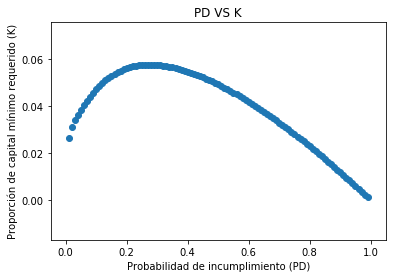

In [115]:
plt.scatter(kpd['PD'],kpd['K'])
plt.xlabel('Probabilidad de incumplimiento (PD)')
plt.title('PD VS K')
plt.ylabel('Proporción de capital mínimo requerido (K)')
plt.show()

Es creciente hasta que topa aproximadamente en .06 del capital, después es decreciente hasta llegar al 0 

### PREGUNTA 3

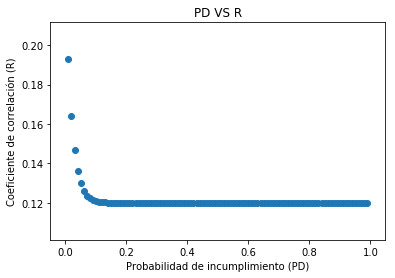

In [116]:
plt.scatter(kpd['PD'],kpd['R'])
plt.xlabel('Probabilidad de incumplimiento (PD)')
plt.title('PD VS R')
plt.ylabel('Coeficiente de correlación (R)')
plt.show()

### PREGUNTA 4

In [120]:
w = np.linspace(.01, .99, 99)
rwpd=pd.DataFrame(columns=['PD', 'b','R','G_PD','RW'])
rwpd['PD'] = w
rwpd['G_PD'] = norm.ppf(w) 
rwpd['RW']=norm.cdf((((1-.12)**(-.5))*rwpd['G_PD'])+(((.12/(1-.12))**.5)*G_99))

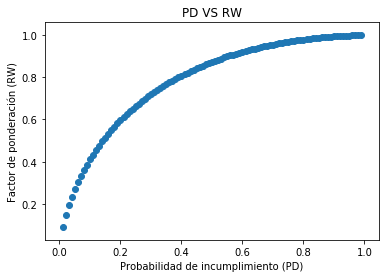

In [121]:
plt.scatter(rwpd['PD'],rwpd['RW'])
plt.xlabel('Probabilidad de incumplimiento (PD)')
plt.ylabel('Factor de ponderación (RW)')
plt.title('PD VS RW')
plt.show()

### PREGUNTA 5

In [122]:
RWA=12.5*K*6880000
RWA

2924758.098727084